In [88]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [82]:
N = 200                               # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

In [89]:
numpy.shape(Y)

(200, 200)

In [90]:
numpy.shape(X)

(200, 200)

In [91]:
X


array([[-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       ...,
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ]])

In [92]:
Y

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.9798995 , -1.9798995 , -1.9798995 , ..., -1.9798995 ,
        -1.9798995 , -1.9798995 ],
       [-1.95979899, -1.95979899, -1.95979899, ..., -1.95979899,
        -1.95979899, -1.95979899],
       ...,
       [ 1.95979899,  1.95979899,  1.95979899, ...,  1.95979899,
         1.95979899,  1.95979899],
       [ 1.9798995 ,  1.9798995 ,  1.9798995 , ...,  1.9798995 ,
         1.9798995 ,  1.9798995 ],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

In [99]:
u_inf = 1.0

u_free = u_inf * numpy.ones((N, N), dtype=float)
v_free = numpy.zeros((N, N), dtype=float)

psi_free = u_inf * Y

In [100]:
def get_vel(sigma, xs, ys, X, Y):
    u = sigma / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = sigma / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [101]:
def get_stream(sigma, xs, ys, X, Y):
    psi = sigma / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

In [102]:
strength = 5.0            # strength of the source
xs, ys = -1.0, 0.0   # location of the source

# compute the velocity field
us, vs = get_velocity(strength, xs, ys, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength, xs, ys, X, Y)

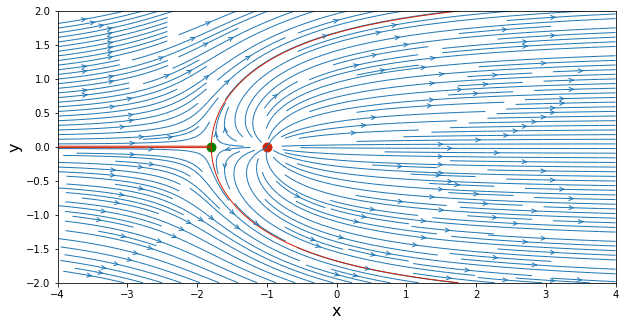

In [143]:
# superposition of the source on the freestream
uf = u_free + us
vf = v_free + vs
psi = psi_free + psi_source

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, uf, vf, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, levels=[-2.5, 2.5], colors='#CD2306', linewidths=1, linestyles='solid');

In [112]:
x_stagnation


-1.7957747154594768

In [119]:
b= 2 * numpy.pi*(xs-x_stagnation)

In [120]:
b

5.0

In [121]:
x_sink, y_sink=  1.0, 0.0

u_sink, v_sink = get_vel(-strength, x_sink, y_sink, X, Y)

psi_sink = get_stream(-strength, x_sink, y_sink, X, Y)

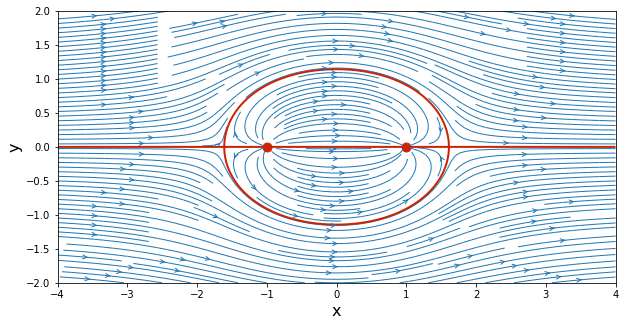

In [147]:
u = u_free + us + u_sink
v = v_free + vs + v_sink
psi = psi_free + psi_source + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([xs, x_sink], [ys, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.0], colors='#CD2305', linewidths=2, linestyles='solid');

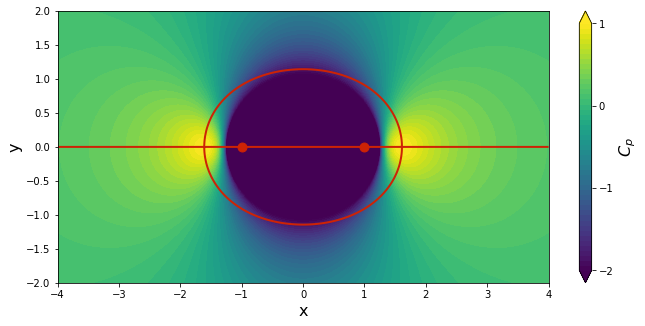

In [157]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 50), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');